# Marketing Funnel Analysis Project

## Objective
Analyze how users move from:
Visitors → Leads → Customers

### Business Questions:
- Where are users dropping off?
- Which channels bring high-quality leads?
- Which stage needs optimization?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
data = {
    'Channel': ['Facebook', 'Google Ads', 'Instagram', 'LinkedIn'],
    'Visitors': [1200, 2000, 1000, 800],
    'Leads': [240, 350, 150, 220],
    'Customers': [50, 120, 40, 90]
}

df = pd.DataFrame(data)
df


,Channel,Visitors,Leads,Customers
0,Facebook,1200,240,50
1,Google Ads,2000,350,120
2,Instagram,1000,150,40
3,LinkedIn,800,220,90


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Channel    4 non-null      object
 1   Visitors   4 non-null      int64 
 2   Leads      4 non-null      int64 
 3   Customers  4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 260.0+ bytes


In [4]:
df.describe()


,Visitors,Leads,Customers
count,4.000000,4.000000,4.000000
mean,1250.000000,240.000000,75.000000
std,525.991128,82.865353,36.968455
min,800.000000,150.000000,40.000000
25%,950.000000,202.500000,47.500000
50%,1100.000000,230.000000,70.000000
75%,1400.000000,267.500000,97.500000
max,2000.000000,350.000000,120.000000


# Data Cleaning & Validation

We will:
- Check for missing values
- Check for duplicate rows
- Validate logical consistency


In [5]:
df.isnull().sum()


Channel      0
Visitors     0
Leads        0
Customers    0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df[df['Leads'] > df['Visitors']]


,Channel,Visitors,Leads,Customers


# Channel Performance Analysis

Goal:
Identify which channel brings high-quality leads.


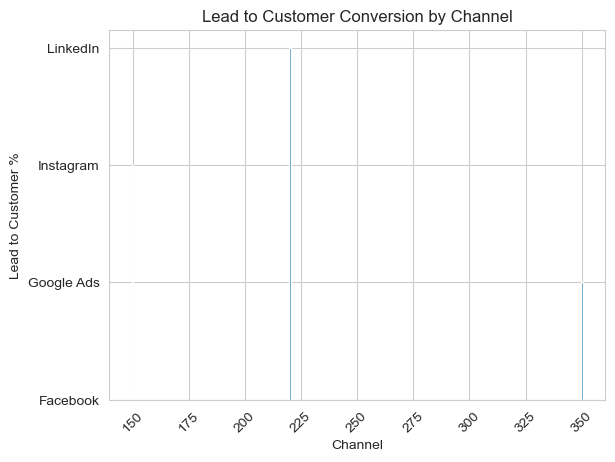

In [13]:
plt.figure()
plt.bar(df['Leads'], df['Channel'])
plt.title("Lead to Customer Conversion by Channel")
plt.xlabel("Channel")
plt.ylabel("Lead to Customer %")
plt.xticks(rotation=45)
plt.show()


In [17]:
best_channel = df.loc[df['Leads'].idxmax()]
best_channel


Channel      Google Ads
Visitors           2000
Leads               350
Customers           120
Name: 1, dtype: object

# Business Insights

## Key Findings

1. Google Ads generates the highest number of customers.
2. LinkedIn has the highest Lead → Customer conversion rate.
3. Instagram shows lower conversion compared to traffic volume.

## Recommendations

- Increase budget on LinkedIn (high-quality leads).
- Optimize Facebook landing page to reduce drop-off.
- Improve email nurturing for Instagram leads.
- A/B test landing pages to improve Visitor → Lead rate.


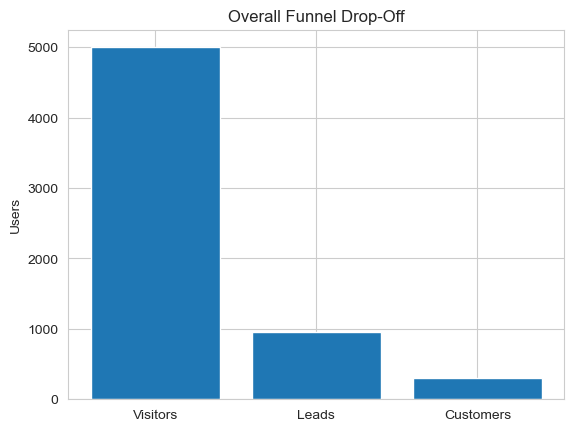

In [18]:
total_visitors = df['Visitors'].sum()
total_leads = df['Leads'].sum()
total_customers = df['Customers'].sum()

stages = ['Visitors', 'Leads', 'Customers']
values = [total_visitors, total_leads, total_customers]

plt.figure()
plt.bar(stages, values)
plt.title("Overall Funnel Drop-Off")
plt.ylabel("Users")
plt.show()
